<a href="https://colab.research.google.com/github/buddhabhushan/FaceRecognitionModel/blob/master/FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [4]:
cd drive

/content/drive


In [5]:
cd My Drive

/content/drive/My Drive


In [6]:
cd Face Recognition

/content/drive/My Drive/Face Recognition


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.engine.topology import Layer
from keras import backend as K
K.set_image_data_format('channels_first')
import cv2
import os
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
from fr_utils import *
from inception_blocks_v2 import *
from google.colab.patches import cv2_imshow

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [8]:
import tensorflow as tf
import keras.backend.tensorflow_backend as tfback

print("tf.__version__ is", tf.__version__)
print("tf.keras.__version__ is:", tf.keras.__version__)

def _get_available_gpus():
    """Get a list of available gpu devices (formatted as strings).

    # Returns
        A list of available GPU devices.
    """
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus

tf.__version__ is 2.2.0
tf.keras.__version__ is: 2.3.0-tf


In [0]:
FRModel = faceRecoModel(input_shape=(3, 96, 96))

In [0]:
def triplet_loss(y_true, y_pred, alpha = 0.2):
    anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]
    pos_dis = tf.reduce_sum(tf.square(tf.subtract(anchor, positive)), axis = -1)
    neg_dis = tf.reduce_sum(tf.square(tf.subtract(anchor, negative)), axis = -1)
    basic_loss = tf.add(tf.subtract(pos_dis, neg_dis), alpha)
    loss = tf.reduce_sum(tf.maximum(0.0, basic_loss))
    return loss

In [0]:
FRModel.compile(optimizer='adam', loss = triplet_loss, metrics=['accuracy'])
load_weights_from_FaceNet(FRModel)

In [0]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [0]:
database = {}

for person in os.listdir('./Database'):
    for image in os.listdir('./Database/' + person):
        encoding = 0
        img = cv2.imread('./Database/' + person + '/' + image)
        imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(imgGray, 1.3, 5)
        for (x, y, w, h) in faces:
            face = img[y:y+h, x:x+w]
            face = cv2.resize(face, (96, 96))
            cv2.imwrite('./Database_face/' + person + '/' + image, face)
            encoding += img_to_encoding(face, FRModel)
        encoding = encoding/3.0
        database[person] = encoding



In [0]:
def verification(img_path, database, model):
    encoding = img_to_encoding(img_path, model)
    name = ''
    min_dist = 1.0
    for (id1, enc) in database.items():
        dist = np.linalg.norm(enc - encoding)
        # print(enc , "\n")
        # print(id1, dist)
        if dist < min_dist:
            min_dist = dist
            name = id1
    if min_dist < 0.82:
        print("It's " + name + ".")
    else:
        print("No Data Found.")
    return name, min_dist

It's Budds.


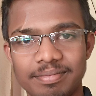

It's Akash.


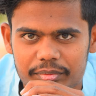

It's Rahul.


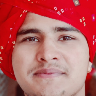

It's Atharv.


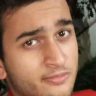

It's Sohel.


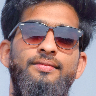

It's Sohel.


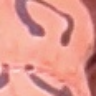

It's Triveni.


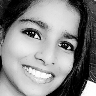

In [93]:
count = 1
for image in os.listdir('./test'):
    # print(count)
    count = count + 1
    img = cv2.imread('./test/' + image)
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(imgGray, 1.3, 5)
    for (x, y, w, h) in faces:
        # cv2_imshow(img)
        face = img[y:y+h, x:x+w]
        face = cv2.resize(face, (96, 96))
        cv2.imwrite('./test_face/' + image, face)
        name, min_dist = verification(face, database, FRModel)
        cv2_imshow(face)
        # print(min_dist)

# print(count)

In [0]:
from google.colab.patches import cv2_imshow

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5500  100  5500    0     0    97k      0 --:--:-- --:--:-- --:--:--   97k


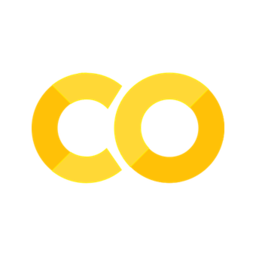

In [69]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)